In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [93]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
tf.config.experimental_run_functions_eagerly(True)
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow import keras 

In [3]:
df=gpd.read_file("C:/Users/Ritwik/Downloads/IBTrACS.WP.list.v04r00.lines.shp")

In [94]:
df.head(15)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,USA_SEA_SW,USA_SEA_NW,STORM_SPD,STORM_DR,year,month,day,hour,min,geometry
0,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-24 16:00:00,NR,16.50,124.00,...,NaN,NaN,6,281,1884,6,24,16,0,"LINESTRING (124.00000 16.50000, 123.80005 16.5..."
1,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-24 18:00:00,NR,16.54,123.80,...,NaN,NaN,6,282,1884,6,24,18,0,"LINESTRING (123.80005 16.53729, 123.50000 16.5..."
2,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-24 21:00:00,NR,16.60,123.50,...,NaN,NaN,6,283,1884,6,24,21,0,"LINESTRING (123.50000 16.59782, 123.19995 16.6..."
3,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 00:00:00,NR,16.67,123.20,...,NaN,NaN,6,286,1884,6,25,0,0,"LINESTRING (123.19995 16.67063, 122.90002 16.7..."
4,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 03:00:00,NR,16.76,122.90,...,NaN,NaN,6,289,1884,6,25,3,0,"LINESTRING (122.90002 16.76335, 122.80005 16.8..."
5,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 04:00:00,NR,16.80,122.80,...,NaN,NaN,6,293,1884,6,25,4,0,"LINESTRING (122.80005 16.80000, 122.59998 16.8..."
6,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 06:00:00,NR,16.88,122.60,...,NaN,NaN,6,295,1884,6,25,6,0,"LINESTRING (122.59998 16.88277, 122.30005 17.0..."
7,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 09:00:00,NR,17.03,122.30,...,NaN,NaN,6,298,1884,6,25,9,0,"LINESTRING (122.30005 17.02593, 122.00000 17.1..."
8,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 12:00:00,NR,17.18,122.00,...,NaN,NaN,7,299,1884,6,25,12,0,"LINESTRING (122.00000 17.18355, 121.69995 17.3..."
9,1884177N17124,1884,14,WP,MM,NOT_NAMED,1884-06-25 15:00:00,NR,17.35,121.70,...,NaN,NaN,7,300,1884,6,25,15,0,"LINESTRING (121.69995 17.34625, 121.59998 17.4..."


In [95]:
df['ISO_TIME']

0         1884-06-24 16:00:00
1         1884-06-24 18:00:00
2         1884-06-24 21:00:00
3         1884-06-25 00:00:00
4         1884-06-25 03:00:00
                 ...         
232660    2020-06-13 21:00:00
232661    2020-06-14 00:00:00
232662    2020-06-14 03:00:00
232663    2020-06-14 06:00:00
232664    2020-06-14 09:00:00
Name: ISO_TIME, Length: 232665, dtype: object

In [96]:
df1=df[['ISO_TIME','LON']]
df1.head()#making a new dataframe

,ISO_TIME,LON
0,1884-06-24 16:00:00,124.0
1,1884-06-24 18:00:00,123.8
2,1884-06-24 21:00:00,123.5
3,1884-06-25 00:00:00,123.2
4,1884-06-25 03:00:00,122.9


In [97]:
import pandas as pd
# Convert ISO_TIME into Datetime
df1['ISO_TIME']=pd.to_datetime(df1['ISO_TIME'])

C:\Users\Ritwik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [98]:
df1['created_at_year'] = df1['ISO_TIME'].dt.strftime('%Y-%m-%d')#selecting year month and day

C:\Users\Ritwik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
df1

,ISO_TIME,LON,created_at_year
0,1884-06-24 16:00:00,124.00,1884-06-24
1,1884-06-24 18:00:00,123.80,1884-06-24
2,1884-06-24 21:00:00,123.50,1884-06-24
3,1884-06-25 00:00:00,123.20,1884-06-25
4,1884-06-25 03:00:00,122.90,1884-06-25
...,...,...,...
232660,2020-06-13 21:00:00,112.64,2020-06-13
232661,2020-06-14 00:00:00,112.00,2020-06-14
232662,2020-06-14 03:00:00,111.59,2020-06-14
232663,2020-06-14 06:00:00,111.20,2020-06-14


In [100]:
df1=df1.drop(columns=['ISO_TIME'])

In [101]:
df1=df1.rename(columns={'created_at_year': 'day'})

In [102]:
df1['day']=pd.to_datetime(df1['day'])

In [103]:
df1

,LON,day
0,124.00,1884-06-24
1,123.80,1884-06-24
2,123.50,1884-06-24
3,123.20,1884-06-25
4,122.90,1884-06-25
...,...,...
232660,112.64,2020-06-13
232661,112.00,2020-06-14
232662,111.59,2020-06-14
232663,111.20,2020-06-14


In [104]:
df1=df1.drop_duplicates(subset="day")#droping duplicates as there will be repeated dates in dataset

In [105]:
df1

,LON,day
0,124.00,1884-06-24
3,123.20,1884-06-25
13,120.78,1884-06-26
23,118.69,1884-06-27
33,118.15,1884-06-28
...,...,...
232631,122.70,2020-05-15
232639,120.00,2020-05-16
232645,119.60,2020-06-12
232653,115.50,2020-06-13


another data frame

In [106]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='1/1/1884', end='06/14/2020')

In [107]:
date_rng

DatetimeIndex(['1884-01-01', '1884-01-02', '1884-01-03', '1884-01-04',
               '1884-01-05', '1884-01-06', '1884-01-07', '1884-01-08',
               '1884-01-09', '1884-01-10',
               ...
               '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-13', '2020-06-14'],
              dtype='datetime64[ns]', length=49839, freq='D')

In [108]:
# creating a dataframe containing all dates from 1884 to 2020
import pandas as pd
df2 = pd.DataFrame({'day':date_rng.values})
df2

,day
0,1884-01-01
1,1884-01-02
2,1884-01-03
3,1884-01-04
4,1884-01-05
...,...
49834,2020-06-10
49835,2020-06-11
49836,2020-06-12
49837,2020-06-13


merge two dataframe

In [109]:
#merging both the dataset with outer join
df3=pd.merge(df2, df1, how='outer')


In [110]:
df3.head(500)

,day,LON
0,1884-01-01,NaN
1,1884-01-02,NaN
2,1884-01-03,NaN
3,1884-01-04,NaN
4,1884-01-05,NaN
...,...,...
495,1885-05-10,NaN
496,1885-05-11,NaN
497,1885-05-12,NaN
498,1885-05-13,NaN


In [111]:
df3=df3.fillna(0) #fill NaN values with 0

In [112]:
df3.loc[df3['LON']> 0, 'LON'] = 1 #if LON>0 then assign it 1

In [113]:
df3

,day,LON
0,1884-01-01,0.0
1,1884-01-02,0.0
2,1884-01-03,0.0
3,1884-01-04,0.0
4,1884-01-05,0.0
...,...,...
49834,2020-06-10,0.0
49835,2020-06-11,0.0
49836,2020-06-12,1.0
49837,2020-06-13,1.0


In [114]:
df3.head(500)

,day,LON
0,1884-01-01,0.0
1,1884-01-02,0.0
2,1884-01-03,0.0
3,1884-01-04,0.0
4,1884-01-05,0.0
...,...,...
495,1885-05-10,0.0
496,1885-05-11,0.0
497,1885-05-12,0.0
498,1885-05-13,0.0


In [115]:
df3.shape

(49839, 2)

In [116]:
df3

,day,LON
0,1884-01-01,0.0
1,1884-01-02,0.0
2,1884-01-03,0.0
3,1884-01-04,0.0
4,1884-01-05,0.0
...,...,...
49834,2020-06-10,0.0
49835,2020-06-11,0.0
49836,2020-06-12,1.0
49837,2020-06-13,1.0


In [117]:
#df3.to_csv('1884-2021.csv')

In [118]:
co=df3['LON']
co

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49834    0.0
49835    0.0
49836    1.0
49837    1.0
49838    1.0
Name: LON, Length: 49839, dtype: float64

In [119]:
# Import the acf module and the plot_acf module from statsmodels


In [120]:
df4=df3.reset_index()['LON']

In [121]:
df4

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49834    0.0
49835    0.0
49836    1.0
49837    1.0
49838    1.0
Name: LON, Length: 49839, dtype: float64

In [122]:
import numpy as np

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

In [124]:
print(df4)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [125]:
##splitting dataset into train and test split
training_size=int(len(df4)*0.70)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [126]:
training_size,test_size

(34887, 14952)

In [127]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [128]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1095
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [129]:
print(X_train.shape), print(y_train.shape)

(33791, 1095)
(33791,)


(None, None)

In [130]:
print(X_test.shape), print(ytest.shape)

(13856, 1095)
(13856,)


(None, None)

In [131]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [132]:
import tensorflow as tf
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [133]:
X_train.shape

(33791, 1095, 1)

In [134]:
import tensorflow as tf
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32,input_shape=X_train.shape[-2:]),
    #tf.keras.layers.Dropout(0.02),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

simple_lstm_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


In [135]:
simple_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [136]:
history=simple_lstm_model.fit(X_train,y_train,epochs=150,verbose=1)

Train on 33791 samples
Epoch 1/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.3069 - accuracy: 0.8895
Epoch 2/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2293 - accuracy: 0.9351
Epoch 3/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2257 - accuracy: 0.9351
Epoch 4/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2248 - accuracy: 0.9351
Epoch 5/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2244 - accuracy: 0.9351
Epoch 6/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2234 - accuracy: 0.9351
Epoch 7/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2238 - accuracy: 0.9351
Epoch 8/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2230 - accuracy: 0.9351
Epoch 9/150
33791/33791 [==============================] - 41s 1ms/sample - loss: 0.2224 - accuracy: 0.9351
Epoch

33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2082 - accuracy: 0.9354
Epoch 77/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2068 - accuracy: 0.9352
Epoch 78/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2062 - accuracy: 0.9351
Epoch 79/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2082 - accuracy: 0.9353
Epoch 80/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2058 - accuracy: 0.9351
Epoch 81/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2059 - accuracy: 0.9355
Epoch 82/150
33791/33791 [==============================] - 43s 1ms/sample - loss: 0.2051 - accuracy: 0.9352
Epoch 83/150
33791/33791 [==============================] - 43s 1ms/sample - loss: 0.2209 - accuracy: 0.9352
Epoch 84/150
33791/33791 [==============================] - 42s 1ms/sample - loss: 0.2229 - accuracy: 0.9351
Epoch 85/150
33791/33791 [======

33791/33791 [==============================] - 41s 1ms/sample - loss: 0.1954 - accuracy: 0.9361


In [ ]:
'''#SAVING MODEL

# Serialize model to JSON
model_json =simple_lstm_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
simple_lstm_model.save_weights("model.h5")
print("Saved Model to Disk")'''

In [ ]:
'''# Load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded Model from Disk")
model = loaded_model
'''

In [ ]:
#simple_lstm_model.save('best_mode.h5')

In [137]:
from tensorflow import keras 
from tensorflow.keras.models import load_model
#model = load_model('best_mode.h5',compile = False)

In [ ]:
#model

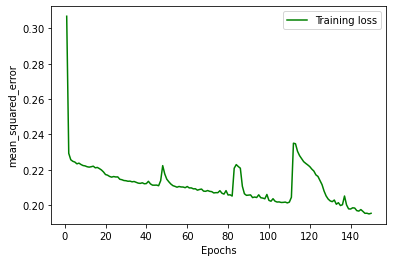

In [138]:
import matplotlib.pyplot as plt 
loss_train = history.history['loss']
#loss_val = history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
#plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

In [139]:
### Lets Do the prediction and check performance metrics
train_predict=simple_lstm_model.predict(X_train)
test_predict=simple_lstm_model.predict(X_test)

In [140]:
test_predict[4001]

array([0.9471869], dtype=float32)

In [141]:
ytest.shape

(13856,)

In [142]:
ytest1=np.reshape(ytest, (13856, 1))

In [143]:
ytest1[4001]

array([1.])

In [144]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.22895504631278285

In [145]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
ytest1=scaler.inverse_transform(ytest1)

In [146]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest1,test_predict))

0.22101077270939207

In [147]:
from sklearn.metrics import r2_score
r2_score(ytest1,test_predict)

0.8046169167491124

In [245]:
#g=test_predict

In [246]:
#dfp=pd.DataFrame(g, columns=['prob'])

In [247]:
#dft=pd.DataFrame(ytest1, columns=['prob'])

In [56]:
#dft

In [57]:
#dfp

In [58]:
#dfp.prob.value_counts()

In [59]:
#dft.prob.value_counts()

In [253]:
#dfp.loc[dfp['prob']> 0.5, 'prob'] = 1 #if LON<0.5 then assign it 0

In [255]:
'''from sklearn.metrics import confusion_matrix
CM = confusion_matrix(dft,dfp)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]'''

In [60]:
#TP/14911

In [61]:
#FN/14911

In [62]:
#TN/14911

In [63]:
#FP/14911

In [244]:
#len(test_data)

In [140]:
#df3

,day,LON
0,1884-01-01,0.0
1,1884-01-02,0.0
2,1884-01-03,0.0
3,1884-01-04,0.0
4,1884-01-05,0.0
...,...,...
49834,2020-06-10,0.0
49835,2020-06-11,0.0
49836,2020-06-12,1.0
49837,2020-06-13,1.0


In [141]:
#df3=df3.rename(columns={'LON': 'Prob'})

In [352]:
df22=pd.read_csv("C:/Users/Ritwik/2020_new.csv")

In [353]:
#df22

In [354]:
#df22.drop(['Unnamed: 0'], axis=1, inplace=True)

In [355]:
df22

,day,Prob
0,2020-06-15,1.0
1,2020-06-16,0.0
2,2020-06-17,0.0
3,2020-06-18,0.0
4,2020-06-19,0.0
...,...,...
195,2020-12-27,1.0
196,2020-12-28,1.0
197,2020-12-29,1.0
198,2020-12-30,1.0


In [356]:
#df22.loc[df22['Prob']> 0.49, 'Prob'] = 1

In [357]:
#df22.loc[df22['Prob']< 0.49, 'Prob'] = 0

In [358]:
#df22

In [359]:
#df3.loc[49642]

In [360]:
num=df22['Prob'].values

In [62]:
test_data.shape

(14952, 1)

In [63]:
#num.shape

In [226]:
#x_input=test_data[13857:].reshape(1,-1)
#x_input.shape

(1, 1064)

In [80]:
#df20=pd.read_csv('2020_6.csv')

In [81]:
#df20['day'] = pd.to_datetime(df20['day'],format='%Y-%d-%m') 

In [82]:
#df20

In [83]:
#add=df20['Prob'].values

In [84]:
#len(add)

In [85]:
#len(test_data)

In [376]:
x_input=test_data[14057:].reshape(1,-1)
x_input1=num.reshape(1,-1)

In [377]:
x_input=np.append(x_input, x_input1)

In [378]:
x_input.shape

(1095,)

In [379]:
x_input

array([1., 1., 1., ..., 1., 1., 1.])

In [380]:
temp_input=list(x_input)
#temp_input=temp_input[0].tolist()

In [381]:
temp_input

[1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [382]:
from numpy import array

lst_output=[]
n_steps=1095
i=0
while(i<500):
    
    if(len(temp_input)>1095):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.99177843]
1096
1 day input [1.         1.         0.         ... 1.         1.         0.99177843]
1 day output [[0.9914921]]
2 day input [1.         0.         0.         ... 1.         0.99177843 0.99149209]
2 day output [[0.99153143]]
3 day input [0.         0.         0.         ... 0.99177843 0.99149209 0.99153143]
3 day output [[0.9914579]]
4 day input [0.         0.         0.         ... 0.99149209 0.99153143 0.99145788]
4 day output [[0.9914369]]
5 day input [0.         0.         0.         ... 0.99153143 0.99145788 0.9914369 ]
5 day output [[0.9912759]]
6 day input [0.         0.         0.         ... 0.99145788 0.9914369  0.99127591]
6 day output [[0.99102145]]
7 day input [0.         0.         0.         ... 0.9914369  0.99127591 0.99102145]
7 day output [[0.9906596]]
8 day input [0.         0.         0.         ... 0.99127591 0.99102145 0.99065959]
8 day output [[0.9902126]]
9 day input [0.         0.         0.         ... 0.99102145 0.99065959 0.99021262]
9 day ou

73 day output [[0.9615201]]
74 day input [0.         0.         0.         ... 0.96177036 0.96164298 0.96152008]
74 day output [[0.96140295]]
75 day input [0.         0.         0.         ... 0.96164298 0.96152008 0.96140295]
75 day output [[0.9612883]]
76 day input [0.         0.         0.         ... 0.96152008 0.96140295 0.96128827]
76 day output [[0.9611725]]
77 day input [0.         0.         0.         ... 0.96140295 0.96128827 0.96117252]
77 day output [[0.961059]]
78 day input [0.         0.         1.         ... 0.96128827 0.96117252 0.96105897]
78 day output [[0.9609534]]
79 day input [0.         1.         1.         ... 0.96117252 0.96105897 0.96095341]
79 day output [[0.9608552]]
80 day input [1.         1.         1.         ... 0.96105897 0.96095341 0.96085519]
80 day output [[0.9607163]]
81 day input [1.         1.         1.         ... 0.96095341 0.96085519 0.96071631]
81 day output [[0.960614]]
82 day input [1.         1.         1.         ... 0.96085519 0.96071

145 day output [[0.95594317]]
146 day input [0.         0.         0.         ... 0.95603013 0.95598686 0.95594317]
146 day output [[0.95589995]]
147 day input [0.         0.         0.         ... 0.95598686 0.95594317 0.95589995]
147 day output [[0.9558573]]
148 day input [0.         0.         0.         ... 0.95594317 0.95589995 0.95585728]
148 day output [[0.95581454]]
149 day input [0.         0.         1.         ... 0.95589995 0.95585728 0.95581454]
149 day output [[0.95577174]]
150 day input [0.         1.         1.         ... 0.95585728 0.95581454 0.95577174]
150 day output [[0.9557305]]
151 day input [1.         1.         1.         ... 0.95581454 0.95577174 0.9557305 ]
151 day output [[0.95569044]]
152 day input [1.         1.         1.         ... 0.95577174 0.9557305  0.95569044]
152 day output [[0.9556507]]
153 day input [1.         1.         1.         ... 0.9557305  0.95569044 0.95565069]
153 day output [[0.95561147]]
154 day input [1.         1.         1.      

217 day output [[0.95402235]]
218 day input [1.         1.         1.         ... 0.95405304 0.95403767 0.95402235]
218 day output [[0.9540074]]
219 day input [1.         1.         1.         ... 0.95403767 0.95402235 0.95400739]
219 day output [[0.95399284]]
220 day input [1.         1.         1.         ... 0.95402235 0.95400739 0.95399284]
220 day output [[0.95397896]]
221 day input [1.         1.         1.         ... 0.95400739 0.95399284 0.95397896]
221 day output [[0.9539656]]
222 day input [1.         1.         1.         ... 0.95399284 0.95397896 0.9539656 ]
222 day output [[0.9539526]]
223 day input [1.         1.         1.         ... 0.95397896 0.9539656  0.95395261]
223 day output [[0.95394003]]
224 day input [1.         1.         1.         ... 0.9539656  0.95395261 0.95394003]
224 day output [[0.95392764]]
225 day input [1.         1.         1.         ... 0.95395261 0.95394003 0.95392764]
225 day output [[0.9539155]]
226 day input [1.         1.         1.       

289 day output [[0.9534341]]
290 day input [0.         1.         1.         ... 0.95344245 0.95343822 0.95343411]
290 day output [[0.95343035]]
291 day input [1.         1.         1.         ... 0.95343822 0.95343411 0.95343035]
291 day output [[0.95342684]]
292 day input [1.         1.         1.         ... 0.95343411 0.95343035 0.95342684]
292 day output [[0.95342284]]
293 day input [1.         1.         1.         ... 0.95343035 0.95342684 0.95342284]
293 day output [[0.95341873]]
294 day input [1.         1.         1.         ... 0.95342684 0.95342284 0.95341873]
294 day output [[0.95341474]]
295 day input [1.         1.         1.         ... 0.95342284 0.95341873 0.95341474]
295 day output [[0.9534108]]
296 day input [1.         1.         1.         ... 0.95341873 0.95341474 0.9534108 ]
296 day output [[0.95340705]]
297 day input [1.         1.         1.         ... 0.95341474 0.9534108  0.95340705]
297 day output [[0.95340323]]
298 day input [1.         1.         1.     

361 day output [[0.9532768]]
362 day input [1.         1.         1.         ... 0.95328003 0.95327842 0.95327681]
362 day output [[0.95327526]]
363 day input [1.         1.         1.         ... 0.95327842 0.95327681 0.95327526]
363 day output [[0.9532738]]
364 day input [1.         1.         1.         ... 0.95327681 0.95327526 0.95327377]
364 day output [[0.95327216]]
365 day input [1.         1.         1.         ... 0.95327526 0.95327377 0.95327216]
365 day output [[0.9532705]]
366 day input [1.         1.         1.         ... 0.95327377 0.95327216 0.95327049]
366 day output [[0.9532689]]
367 day input [1.         1.         1.         ... 0.95327216 0.95327049 0.95326889]
367 day output [[0.9532674]]
368 day input [1.         1.         1.         ... 0.95327049 0.95326889 0.9532674 ]
368 day output [[0.95326585]]
369 day input [1.         1.         1.         ... 0.95326889 0.9532674  0.95326585]
369 day output [[0.9532645]]
370 day input [1.         1.         1.         

433 day output [[0.9532335]]
434 day input [0.         0.         0.         ... 0.95323336 0.95323336 0.95323348]
434 day output [[0.95323336]]
435 day input [0.         0.         1.         ... 0.95323336 0.95323348 0.95323336]
435 day output [[0.9532331]]
436 day input [0.         1.         1.         ... 0.95323348 0.95323336 0.95323312]
436 day output [[0.9532326]]
437 day input [1.         1.         1.         ... 0.95323336 0.95323312 0.95323259]
437 day output [[0.95323247]]
438 day input [1.         1.         1.         ... 0.95323312 0.95323259 0.95323247]
438 day output [[0.95323217]]
439 day input [1.         1.         0.         ... 0.95323259 0.95323247 0.95323217]
439 day output [[0.9532323]]
440 day input [1.         0.         0.         ... 0.95323247 0.95323217 0.95323229]
440 day output [[0.95323193]]
441 day input [0.         0.         0.         ... 0.95323217 0.95323229 0.95323193]
441 day output [[0.9532314]]
442 day input [0.         0.         0.        

In [323]:
type(lst_output)

list

In [324]:
df6=pd.DataFrame(lst_output, columns=['prob'])

In [325]:
df6=df6.reset_index()['prob']

In [326]:
df6.shape

(200,)

In [327]:
type(df6)

pandas.core.series.Series

In [328]:
df6=np.array(df6.values.tolist())

In [329]:
type(df6)

numpy.ndarray

In [330]:
df6=np.reshape(df6, (200, 1))

In [331]:
df6=scaler.inverse_transform(df6)

In [332]:
df6.shape

(200, 1)

In [333]:
date_rn = pd.date_range(start='6/15/2020', end='12/31/2020')

In [334]:
date_rn 

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=200, freq='D')

In [335]:
df11 = pd.DataFrame({'day':date_rn.values})
df11

,day
0,2020-06-15
1,2020-06-16
2,2020-06-17
3,2020-06-18
4,2020-06-19
...,...
195,2020-12-27
196,2020-12-28
197,2020-12-29
198,2020-12-30


In [336]:
df12 = pd.DataFrame({'Prob': df6[:, 0]})
df12

,Prob
0,0.922905
1,0.709597
2,0.570720
3,0.479218
4,0.346117
...,...
195,0.970787
196,0.970229
197,0.969854
198,0.969529


In [337]:
 result =pd.merge(df11, df12, left_index=True, right_index=True)

In [338]:
result

,day,Prob
0,2020-06-15,0.922905
1,2020-06-16,0.709597
2,2020-06-17,0.570720
3,2020-06-18,0.479218
4,2020-06-19,0.346117
...,...,...
195,2020-12-27,0.970787
196,2020-12-28,0.970229
197,2020-12-29,0.969854
198,2020-12-30,0.969529


In [340]:
#df_res = pd.DataFrame()

In [252]:
#df_res=dup

In [341]:
dup=df_res

In [342]:
df_res=df_res.append(result)

In [343]:
df_res=df_res.reset_index()

In [344]:
df_res.drop(['index'], axis=1, inplace=True)

In [345]:
df_res

,day,Prob
0,2020-06-15,0.922905
1,2020-06-16,0.709597
2,2020-06-17,0.570720
3,2020-06-18,0.479218
4,2020-06-19,0.346117
...,...,...
195,2020-12-27,0.970787
196,2020-12-28,0.970229
197,2020-12-29,0.969854
198,2020-12-30,0.969529


In [347]:
df_res.loc[df_res['Prob']> 0.9, 'Prob'] = 1

In [348]:
dup.tail()

""


In [349]:
dcsv_2020=df_res

In [350]:
dcsv_2020

,day,Prob
0,2020-06-15,1.0
1,2020-06-16,0.0
2,2020-06-17,0.0
3,2020-06-18,0.0
4,2020-06-19,0.0
...,...,...
195,2020-12-27,1.0
196,2020-12-28,1.0
197,2020-12-29,1.0
198,2020-12-30,1.0


In [351]:
dcsv_2020.to_csv('2020_new.csv',index = False,date_format='%Y-%m-%d') # Save the dataframe to csv for checkpoint

In [74]:
#result.loc[result['Prob']> 0.5, 'Prob'] = 1 #if LON>0.5 then assign it 1

In [75]:
result.loc[result['Prob']< 0.5, 'Prob'] = 0 #if LON<0.5 then assign it 0

In [76]:
result

,day,Prob
0,2021-01-01,0.0
1,2021-01-02,0.0
2,2021-01-03,0.0
3,2021-01-04,0.0
4,2021-01-05,0.0
...,...,...
1821,2025-12-27,1.0
1822,2025-12-28,1.0
1823,2025-12-29,1.0
1824,2025-12-30,1.0


In [77]:
#result.to_csv('2021-2025.csv') # Save the dataframe to csv for checkpoint

In [78]:
df3

,day,LON
0,1884-01-01,0.0
1,1884-01-02,0.0
2,1884-01-03,0.0
3,1884-01-04,0.0
4,1884-01-05,0.0
...,...,...
50034,2020-12-27,0.0
50035,2020-12-28,0.0
50036,2020-12-29,0.0
50037,2020-12-30,0.0


In [79]:
df3=df3.rename(columns={'LON': 'Prob'})

In [80]:
re=pd.concat([df3,result])

In [88]:
#re.to_csv('1884-2025.csv') # Save the dataframe to csv for checkpoint